In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from astropy.time import Time

In [2]:
### Define Constants

# Take MHJD 54 220 as Center of Transit:
Cot = 54220

folder = "C:/Users/Jemandes/Documents/J1407_code/"

mean_sw = 12.38

In [3]:
# Read in data from SuperWASP:
f = open(folder + 'photometry/SuperWASP/1SWASP_J140747.93-394542.6_lc.txt.txt', 'r')
data = f.readlines()[22:]
lightcurve = np.zeros((len(data), 2))
for (i, entry) in enumerate(data):
    words = entry.split()
    t = Time(float(words[9]), format='jd', scale='utc')
    lightcurve[i] = t.mjd-Cot, float(words[10])
print ("Data from SuperWASP: " + str(len(lightcurve)))

Data from SuperWASP: 28918


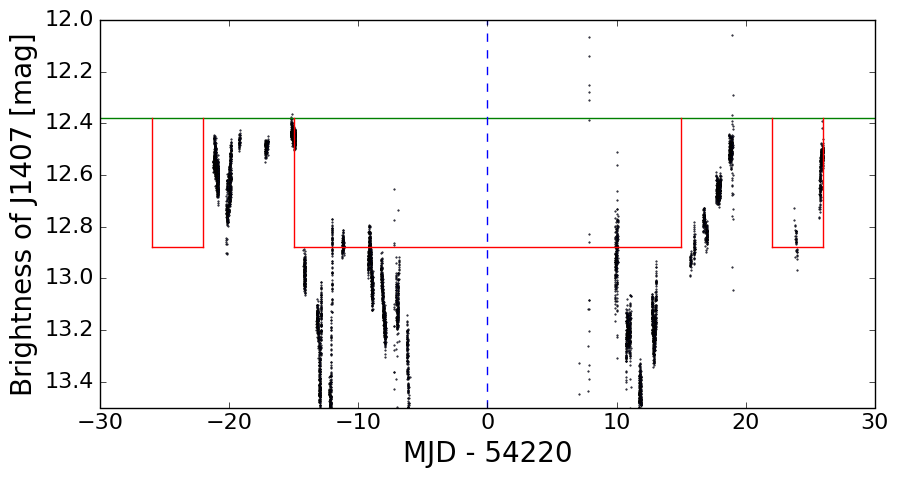

In [4]:
h = mean_sw
l = mean_sw + 0.5

fig = plt.figure(figsize=(10,5))
ax = fig.add_subplot(1,1,1)

ax.scatter(lightcurve[:,0], lightcurve[:, 1], marker='.', s=1)

plt.axhline(y=h, c='g', lw=1)
plt.axvline(x=0, c='b', ls='--')

# First Window
plt.plot([-26,-26],[h,l],c='r')
plt.plot([-26,-22],[l,l],c='r')
plt.plot([-22,-22],[l,h],c='r')

# Second Window
plt.plot([-15,-15],[h,l],c='r')
plt.plot([-15,15],[l,l],c='r')
plt.plot([15,15],[l,h],c='r')

# Third Window
plt.plot([22,22],[h,l],c='r')
plt.plot([22,26],[l,l],c='r')
plt.plot([26,26],[l,h],c='r')

plt.ylabel('Brightness of J1407 [mag]', fontsize=20)
plt.xlabel('MJD - 54220', fontsize=20)
plt.tick_params(axis='both', which='major', labelsize=16)

plt.axis([-30,30,13.5,12])

# plt.savefig(folder + "figure_3/figure_3.pdf")
# plt.savefig(folder + "figure_3/figure_3.png")
plt.show()
plt.close()